In [1]:
import scipy.integrate as integrate
import scipy.constants as const
import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Parametters 
for the first part of the code

In [2]:
L = 1 #length of waveguide in mm
lamb = 1550 #lamb in nm
n = 1.98 #refractive index
tau_p = 1 #pulse length in ps
v_g = 1.5*10**8 #propagation speed in [m/s]

L = L*10**(-3)
lamb = lamb*10**(-9)
tau_p = tau_p*10**(-12)

## Puls propagation definition in z,t

Lets assume:
$$ E(z,t) = E_0 \cdot E(z) \cdot E(t)$$

where
$$ E(t) = e^{-(\frac{T}{\tau})^2} $$
$$ E(z) = e^{-(\frac{Z}{z_0})^2} $$

Now move pulse from [0,0] to an arbitary possition [z,t]
$$ T -> t-\frac{z}{v_g} $$
$$ Z -> z-t\cdot v_g $$

In [3]:
k = lambda lamb: 2*np.pi /lamb
omega = lambda lamb: 2*np.pi * f(lamb)
f = lambda lamb: c/lamb
z_0 = lambda tau_p,v_g: v_g*tau_p
betha = lambda v_g: 1/v_g
#lambda_n = lambda lamb,n: lamb/n
#v_p = lambda n: c/n

#import a few constants
c = const.c
eps0 = const.epsilon_0

In [4]:
A = lambda z,t,tau_p,v_g: np.exp(-((t-z/v_g)/tau_p)**2)*np.exp(-((z-t*v_g)/z_0(tau_p,v_g))**2)

def E(z,t,A0,tau_p,v_g,lamb):
    E_ = A0*A(z,t,tau_p,v_g)*np.exp(1j*(k(lamb)*z-omega(lamb)*t))
    return (E_)

def I(z,t,A0,tau_p,v_g,lamb,n):
    I_ = (c*eps0*n/2)*(E(z,t,A0,tau_p,v_g,lamb)*E(z,t,A0,tau_p,v_g,lamb).conjugate()).real
    return (I_)

## Plot complex amplitudes (RE part)

In [5]:
E(0,0,0.1,tau_p,v_g,lamb)

(0.1+0j)

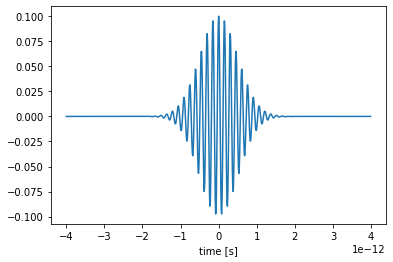

In [6]:
[x,y] = np.array([[t,E(0,t,.1,tau_p,v_g,lamb).real] for t in np.arange(-4*tau_p,4*tau_p,tau_p/100)]).T
plt.plot(x,y)
plt.xlabel('time [s]')
plt.show()

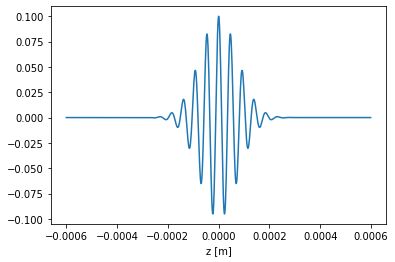

In [7]:
[x,y] = np.array([[z,E(z,0,.1,tau_p,v_g,lamb).real] for z in np.arange(-4*z_0(tau_p,v_g),4*z_0(tau_p,v_g),z_0(tau_p,v_g)/100)]).T
plt.plot(x,y)
plt.xlabel('z [m]')
plt.show()

## Plot Intensity

In [8]:
I(0,0,.1,tau_p,v_g,lamb,n)

2.627874540713027e-05

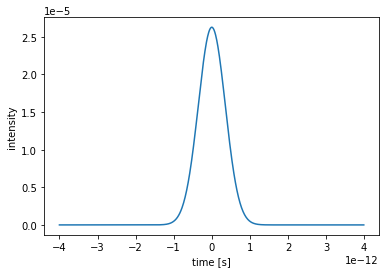

In [9]:
[x,y] = np.array([[t,(I(0,t,.1,tau_p,v_g,lamb,n))] for t in np.arange(-4*tau_p,4*tau_p,tau_p/100)]).T
plt.plot(x,y)
plt.ylabel('intensity')
plt.xlabel('time [s]')
plt.show()

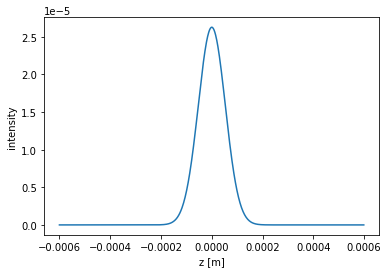

In [10]:
[x,y] = np.array([[z,(I(z,0,.1,tau_p,v_g,lamb,n))] for z in np.arange(-4*z_0(tau_p,v_g),4*z_0(tau_p,v_g),z_0(tau_p,v_g)/100)]).T
plt.plot(x,y)
plt.ylabel('intensity')
plt.xlabel('z [m]')
plt.show()

### 3D plot of "pulse intensity propagation profile"

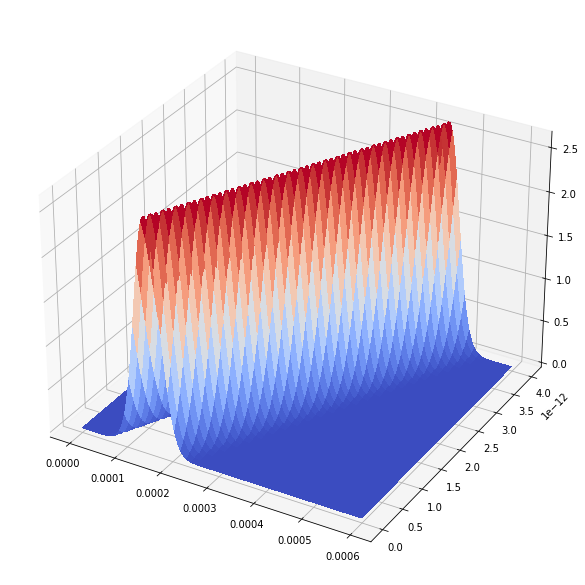

In [11]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_size_inches(18.5, 10.5)

# Make data.
z_plot = np.arange(-0*z_0(tau_p,v_g),4*z_0(tau_p,v_g),z_0(tau_p,v_g)/100)
t_plot = np.arange(-0*tau_p,4*tau_p,tau_p/100)
z_plot, t_plot = np.meshgrid(z_plot, t_plot)
inten = I(z_plot,t_plot+2*tau_p,.1,tau_p,0.5*v_g,lamb,n) # + I(z,t,.1,tau_p,v_g,lamb,n)# + second pulse

# Plot the surface.
surf = ax.plot_surface(z_plot, t_plot, inten, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
#fig.colorbar(surf)

plt.show()

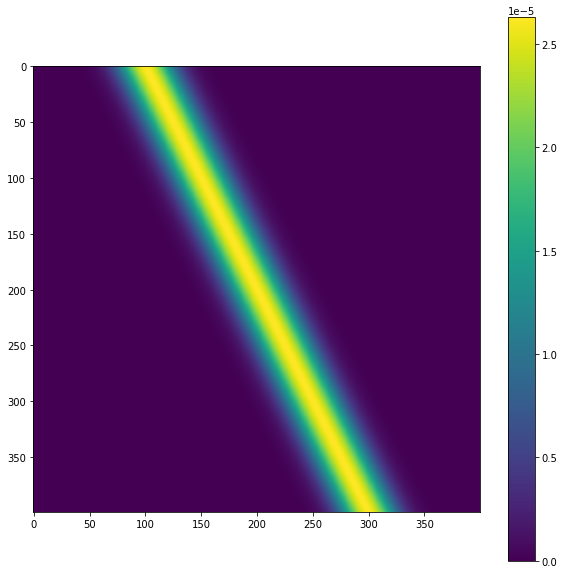

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(np.matrix(inten))
plt.colorbar()
plt.show()

# 2 pulses interaction length

Two pulses, in general, at different wavelengths and in different transverse modes might propagates with different velocities. This will result in the temporal walk-off from each other -> effective interaction length is reduced. Then we can define an effective interaction length,  the length that two pulses (with identical group velocities) would need to get the same interaction strength. The maximum interaction strength is achiever when two pulses are delayed by each other such that the pulses are maximally overlapped in the middle of the waveguide ($z = L/2$).

Then the interaction length

$ L_{eff} = \dfrac{\int_{0}^L \int_{0}^\infty I_1(z,t) I_2(z,t) dz dt}{\int_{0}^\infty I_1(z=L/2,t) I_2(z=L/2,t) dt}$

### Negligible temporal walk-off
Typically for short fiber, one of the pulses is long, or when the groupe velocities are almost identical => $\Gamma << 1$
$\Gamma = \dfrac{0.44\cdot2\cdot\pi}{2\cdot\sqrt{2\cdot\log{2}}} \dfrac{1}{\sqrt{\tau_{p01}^2+\tau_{p02}^2}}\cdot|\Delta \beta|\cdot L$

Then $L_{eff} \approx L$

### Complete temporal walk-off
There is no interaction at the begebning and end of the waveguide, interaction strenght gradually increases, with peak at $z=L/2$ => $\Gamma >> 1$

Then $L_{eff} \approx \dfrac{\sqrt{2}}{\Gamma}\cdot L$

### References:
* https://www.osapublishing.org/oe/fulltext.cfm?uri=oe-21-3-2707&id=248762 
* Patrick Yard thesis
* Benchmark: https://www.nature.com/articles/s41467-020-16187-8.pdf - suplementary https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-020-16187-8/MediaObjects/41467_2020_16187_MOESM1_ESM.pdf

## $A_0$ coefficient from pulse power

Intensity: https://www.rp-photonics.com/optical_intensity.html

Peak power flat-top: https://www.newport.com/medias/sys_master/images/images/h8f/h7a/8797052108830/Average-and-Peak-Power-Calculation-Tech-Note-1.pdf

Peak power Gauss: https://blog.rpmclasers.com/peak-power-and-average-power-in-ns-and-sub-ns-lasers

In [13]:
P_W = lambda P_dBm: 1/1000 *10**(P_dBm/10) # convert dBm to W

P_peak = lambda P_avg, tau_p:0.94*P_avg/(f_rep*tau_p)

A0 = lambda Aeff,n,P_avg,tau_p: np.sqrt(4/(c*n*eps0*Aeff)*P_peak(P_avg,tau_p))

In [14]:
P_W(0) #0dBm = 1mW

0.001

In [15]:
#A0(Aeff,n,P_avg,tau_p)

### Pulses parameters

In [16]:
Aeff = 1.258795448537488 #um^2
P_avg = 1 #W
f_rep = 50 #MHz
tau_p = 1 #pulse length in ps

#f_rep = f_rep *10**6
#Aeff = Aeff *10**(-12)
#tau_p = tau_p*10**(-12)

L = 10 #length of waveguide in mm
#L = L*10**(-3)

#Pulse 1 - I(z,t,A01,tau_p01,v_g01,lamb01,n01)
#A01 = 10
Aeff01 = Aeff
P_avg01 = -27 #dBm
tau_p01 = tau_p
v_g01 = v_g #propagation speed in [m/s]
lamb01 = 1550 #lamb in nm
n01 = n #refractive index

#Pulse 2 - I(z,t,A02,tau_p02,v_g02,lamb02,n02)
#A02 = 8
Aeff02 = Aeff
P_avg02 = 10 #dBm
#tau_p02 = 10.0*tau_p #Gamma >> 1
#v_g02 = 0.1*v_g #Gamma >> 1
tau_p02 = 1.00000001*tau_p #Gamma << 1
v_g02 = 0.999999*v_g #Gamma << 1 
lamb02 = lamb01 #lamb in nm
n02 = n #refractive index

In [17]:
#XPM Switch #1
L = 30 #length of waveguide in mm
f_rep = 50 #MHz

#Pulse 1 - sig.: TE0, 1555nm, 6.18ps
Aeff01 = 1.258795448537488 #um^2
tau_p01 = 6.18 #pulse length in ps
v_g01 = 152228482.56849426 #propagation speed in [m/s]
lamb01 = 1555 #lamb in nm

#Pulse 2 - pump: TE1, 1560nm, 3.87ps
Aeff02 = 1.6575927059408382 #um^2
tau_p02 = 3.87 #pulse length in ps
v_g02 = 148663622.78341362 #propagation speed in [m/s]
lamb02 = 1560 #lamb in nm

print (abs(v_g01-v_g02))

3564859.7850806415


In [18]:
#XPM Switch #1 - two pulses
L = 30 #length of waveguide in mm
f_rep = 500 #MHz

#Pulse 1 - sig.: TE0, 1555nm, 6.18ps
Aeff01 = 1.258795448537488 #um^2
tau_p01 = 6.1827684 #pulse length in ps
v_g01 = 152228482.56849426 #propagation speed in [m/s]
lamb01 = 1555 #lamb in nm

#Pulse 2 - pump: TE1, 1560nm, 3.87ps
Aeff02 = 1.6575927059408382 #um^2
tau_p02 = 2.18215543 #pulse length in ps
v_g02 = 148663622.78341362 #propagation speed in [m/s]
lamb02 = 1560 #lamb in nm

print (abs(v_g01-v_g02))

3564859.7850806415


In [19]:
#XPM Switch #2
L = 40 #length of waveguide in mm
f_rep = 50 #MHz

#Pulse 1 - sig.: TE0, 1555nm, 6.18ps
Aeff01 = 1.258795448537488 #um^2
tau_p01 = 6.18 #pulse length in ps
v_g01 = 153303475.901339 #propagation speed in [m/s]
lamb01 = 1555 #lamb in nm

#Pulse 2 - pump: TE1, 1560nm, 3.87ps
Aeff02 = 1.6575927059408382 #um^2
tau_p02 = 3.87 #pulse length in ps
v_g02 = 150724429.98758566 #propagation speed in [m/s]
lamb02 = 1560 #lamb in nm

print (abs(v_g01-v_g02))

2579045.9137533307


In [20]:
#XPM Switch #3
L = 50 #length of waveguide in mm
f_rep = 50 #MHz

#Pulse 1 - sig.: TE0, 1555nm, 6.18ps
Aeff01 = 1.258795448537488 #um^2
tau_p01 = 6.18 #pulse length in ps
v_g01 = 153710057.3145723 #propagation speed in [m/s]
lamb01 = 1555 #lamb in nm

#Pulse 2 - pump: TE1, 1560nm, 3.87ps
Aeff02 = 1.6575927059408382 #um^2
tau_p02 = 3.87 #pulse length in ps
v_g02 = 152268539.07498124 #propagation speed in [m/s]
lamb02 = 1560 #lamb in nm

print (abs(v_g01-v_g02))

1441518.239591062


In [21]:
#calculate delay between pulses and A0 parametters
L = L*10**(-3)
f_rep = f_rep *10**6
tau_p01 = tau_p01*10**(-12)
tau_p02 = tau_p02*10**(-12)
tau_delay = 1/2*((L/v_g01)-(L/v_g02))
Aeff01 = Aeff01 *10**(-12)
Aeff02 = Aeff02 *10**(-12)
A01 = A0(Aeff01,n01,P_W(P_avg01),tau_p01)
A02 = A0(Aeff02,n02,P_W(P_avg02),tau_p02)
lamb01 = lamb01*10**(-9)
lamb02 = lamb02*10**(-9)


#integration bounds (substitution of infinity in dt)
endT = 2*L/v_g01 #L/v_g01 = time of propagation of the 1. pulse through the whole waveguide
tau_p_ = min(tau_p01,tau_p02)

### Check overlap @ L/2

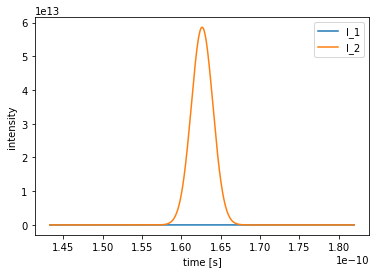

"Time fiber lenght" = 325.29ps
Pulse delay = -1.54ps


In [22]:
[x1,y1] = np.array([[t,(I(L/2,t,A01,tau_p01,v_g01,lamb01,n01))] for t in np.arange(L/2/v_g01-5*tau_p_,L/2/v_g01+5*tau_p_,tau_p_/100)]).T
[x2,y2] = np.array([[t,(I(L/2,t-tau_delay,A02,tau_p02,v_g02,lamb02,n02))] for t in np.arange(L/2/v_g01-5*tau_p_,L/2/v_g01+5*tau_p_,tau_p_/100)]).T
plt.plot(x1,y1,label='I_1')
plt.plot(x2,y2,label='I_2')
plt.ylabel('intensity')
plt.xlabel('time [s]')
plt.legend()
plt.show()
print ('"Time fiber lenght" = ' + str(np.round(L/v_g01*10**12,2)) + 'ps')
print ('Pulse delay = ' + str(np.round(tau_delay*10**12,2)) + 'ps')

### Denominator -> integrate @ $z=L/2$ for $t$(0,"infty")

In [23]:
#Puls 1
# print(integrate.quad(lambda t: I(L/2,t,A01,tau_p01,v_g01,lamb01,n01), 0, endT))
#Puls 2
# print(integrate.quad(lambda t: I(L/2,t-tau_delay,A02,tau_p02,v_g02,lamb02,n02), 0, endT))
# print(integrate.quad(lambda t: I(L/2,t-tau_delay,A02,tau_p02,v_g02,lamb02,n02), 0, 2*endT) #check integration window)
#both
#denom = integrate.quad(lambda t: I(L/2,t,A01,tau_p01,v_g01,lamb01,n01)*I(L/2,t-tau_delay,A02,tau_p02,v_g02,lamb02,n02), 0, endT)[0]
# print(integrate.quad(lambda t: I(L/2,t,A01,tau_p01,v_g01,lamb01,n01)*I(L/2,t-tau_delay,A02,tau_p02,v_g02,lamb02,n02), 0, endT))

In [24]:
# https://numpy.org/doc/stable/reference/generated/numpy.trapz.html
# int_array = I_temp(t_array)
#print (np.trapz(int_array,x = t_array))

In [25]:
t_array = np.linspace(0,endT,3000)
I_temp = lambda t: I(L/2,t,A01,tau_p01,v_g01,lamb01,n01)*I(L/2,t-tau_delay,A02,tau_p02,v_g02,lamb02,n02)
dt = t_array[1]
int_array = I_temp(t_array)*dt

denom = np.sum(int_array)
print(denom)

1643074169602.2136


### Numerator

In [26]:
integrate.dblquad(lambda z, t: I(z,t,A01,tau_p01,v_g01,lamb01,n01)*I(z,t-tau_delay,A02,tau_p02,v_g02,lamb02,n02), 0, L, 0, endT)
#dblquad dosn't work :/

(0.0, 0)

In [27]:
#endT = 2*L/v_g01
start = time.time()
t_array = np.linspace(0,endT,5000)
z_array = np.linspace(0,L,5000)
I_temp = lambda t,z: I(z,t,A01,tau_p01,v_g01,lamb01,n01)*I(z,t-tau_delay,A02,tau_p02,v_g02,lamb02,n02)

res= np.zeros((len(t_array),len(z_array)))
              
for i,t in enumerate(t_array):
    #for j,z in enumerate(z_array):       
        #res[i,j] = I_temp(t,z)
    res[i] = I_temp(t,z_array)
              
int_res = np.trapz(np.trapz(res,x = t_array),x = z_array)
print (str(time.time() - start) + 's')
print(int_res)

11.697114706039429s
77265160950.53093


In [28]:
print ('Len. of waveguide = \t' + str(L) + ' m')
print ('Interaction len = \t' + str(int_res/denom) + ' m')

Len. of waveguide = 	0.05 m
Interaction len = 	0.04702475541273754 m


### Pulse overlap plot

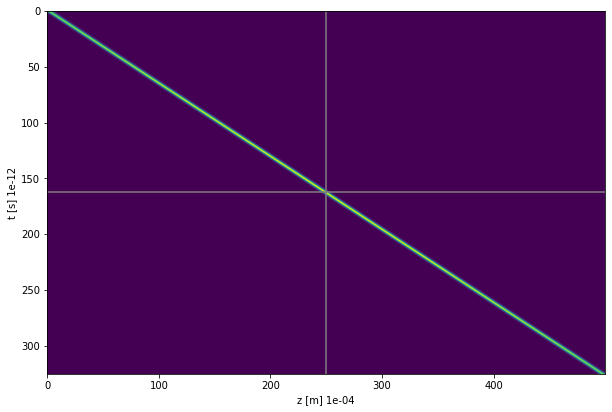

In [29]:
z_plot = np.arange(0,L,z_0(tau_p_,v_g)/10)
t_plot = np.arange(0,L/v_g01,tau_p_/10)
z_plot, t_plot = np.meshgrid(z_plot, t_plot)
inten = I(z_plot,t_plot,A01,tau_p01,v_g01,lamb01,n01) * I(z_plot,t_plot-tau_delay,A02,tau_p02,v_g02,lamb02,n02)# + second pulse

z_scale = 10**4
t_scale = 10**12
plt.figure(figsize=(10,10))
plt.imshow(np.matrix(inten),extent=[z_plot.min()*z_scale,z_plot.max()*z_scale,t_plot.max()*t_scale,t_plot.min()*t_scale])
plt.axvline(x=L/2*z_scale,color='gray')
plt.axhline(y=L/v_g01/2*t_scale,color='gray')
#plt.axvline(x=z_plot[np.where(inten == inten.max())]*z_scale,color='red')
#plt.axhline(y=t_plot[np.where(inten == inten.max())]*t_scale,color='red')
plt.xlabel('z [m] ' + str("{:.0e}".format(1/z_scale)))
plt.ylabel('t [s] ' + str("{:.0e}".format(1/t_scale)))
#plt.colorbar()
#plt.savefig('overlap_plot_Gamma.pdf')
plt.show()

### Calculate $\Gamma$

See Patrick's thesis p. 44

In [30]:
dBetha = lambda v_g1, v_g2: betha(v_g1)-betha(v_g2)
gamma = lambda v_g1, v_g2, tau_p01, tau_p02, L: (0.44*2*np.pi)/(2*np.sqrt(2*np.log(2)))*1/np.sqrt(tau_p01**2+tau_p02**2)*np.abs(dBetha(v_g1,v_g2))*L
#for gamma >> 1
Leff_gamma = lambda v_g1, v_g2, tau_p01, tau_p02, L: np.sqrt(2)/gamma(v_g1, v_g2, tau_p01, tau_p02, L)*L

In [31]:
print ('Gamma = \t\t' + str(gamma(v_g01, v_g02, tau_p01, tau_p02, L)))
print ('\nFor Gamma >> 1:')
print ('Leff_gamma = \t\t' + str(Leff_gamma(v_g01, v_g02, tau_p01, tau_p02, L)))
print ('\nFor Gamma << 1:')
print ('Leff = L = \t\t' + str(L))
print ('\n"True" calculation')
print ('Len. of waveguide = \t' + str(L) + ' m')
print ('Interaction len = \t' + str(int_res/denom) + ' m')

Gamma = 		0.49581770440847794

For Gamma >> 1:
Leff_gamma = 		0.14261426627154075

For Gamma << 1:
Leff = L = 		0.05

"True" calculation
Len. of waveguide = 	0.05 m
Interaction len = 	0.04702475541273754 m


### For extremly long waveguides try: